## Work
1. 請嘗試將 preproc_x 替換成以每筆資料的 min/max 進行標準化至 -1 ~ 1 間，再進行訓練
2. 請嘗試將 mlp 疊更深 (e.g 5~10 層)，進行訓練後觀察 learning curve 的走勢
3. (optional) 請改用 GPU 進行訓練 (可善用 google colab)，比較使用 CPU 與 GPU 的訓練速度

In [ ]:
## 
"""
Your code here (optional)
確認硬體資源
"""
## 確認硬體資源 (如果你是在 Linux, 若是在 Windows, 請參考 https://blog.csdn.net/idwtwt/article/details/78017565)
!nvidia-smi

In [20]:
import os
import tensorflow as tf
import keras
from keras.datasets import cifar10
# 請嘗試設定 GPU：os.environ


In [5]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
num_classes = 10

# The data, split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# Convert class vectors to binary class matrices.
y_train = keras.utils.np_utils.to_categorical(y_train, num_classes)
y_test = keras.utils.np_utils.to_categorical(y_test, num_classes)

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [11]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

## 資料前處理
"""
Your code here
"""
def preproc_x(x, flatten=True):
    min = np.min(x)
    max = np.max(x)
    x = x-min/max-min
  
    if flatten:
        x = x.reshape((len(x), -1))
    
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [12]:


# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [14]:
"""Code Here
建立你的神經網路
"""
def build_mlp(input_shape, output_units=10, num_neurons=[1024, 768, 512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model



In [15]:
model = build_mlp(input_shape=x_train.shape[1:])
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 1024)              3146752   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 768)               787200    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 512)               393728    
_________________________________________________________________
hidden_layer4 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer5 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290  

2021-11-18 11:34:51.761211: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2021-11-18 11:34:51.761324: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2021-11-18 11:34:51.761378: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (11402.pyspark3): /proc/driver/nvidia/version does not exist
2021-11-18 11:34:51.762751: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [16]:
## 超參數設定
LEARNING_RATE = 0.001
EPOCHS = 100
BATCH_SIZE = 256

In [22]:
optimizer = tf.keras.optimizers.Adam(learning_rate=LEARNING_RATE)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

In [23]:
model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True)

2021-11-18 11:38:07.851379: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 614400000 exceeds 10% of free system memory.
2021-11-18 11:38:08.181298: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/100
196/196 [==============================] - 10s 48ms/step - loss: 48.1435 - accuracy: 0.2140 - val_loss: 1.9656 - val_accuracy: 0.3069
Epoch 2/100
196/196 [==============================] - 9s 44ms/step - loss: 1.8982 - accuracy: 0.3266 - val_loss: 1.9919 - val_accuracy: 0.3008
Epoch 3/100
196/196 [==============================] - 10s 49ms/step - loss: 1.7767 - accuracy: 0.3694 - val_loss: 1.7144 - val_accuracy: 0.3861
Epoch 4/100
196/196 [==============================] - 9s 47ms/step - loss: 1.7002 - accuracy: 0.3956 - val_loss: 1.6818 - val_accuracy: 0.4045
Epoch 5/100
196/196 [==============================] - 9s 44ms/step - loss: 1.6453 - accuracy: 0.4165 - val_loss: 1.6394 - val_accuracy: 0.4196
Epoch 6/100
196/196 [==============================] - 10s 49ms/step - loss: 1.6066 - accuracy: 0.4299 - val_loss: 1.6577 - val_accuracy: 0.4117
Epoch 7/100
196/196 [==============================] - 8s 43ms/step - loss: 1.5710 - accuracy: 0.4417 - val_loss: 1.6007 - val_accur

196/196 [==============================] - 7s 38ms/step - loss: 0.8552 - accuracy: 0.6957 - val_loss: 1.8757 - val_accuracy: 0.4848
Epoch 58/100
196/196 [==============================] - 7s 38ms/step - loss: 0.8364 - accuracy: 0.7011 - val_loss: 1.8523 - val_accuracy: 0.4849
Epoch 59/100
196/196 [==============================] - 7s 38ms/step - loss: 0.8314 - accuracy: 0.7053 - val_loss: 1.8295 - val_accuracy: 0.4963
Epoch 60/100
196/196 [==============================] - 7s 37ms/step - loss: 0.8021 - accuracy: 0.7153 - val_loss: 1.8639 - val_accuracy: 0.4896
Epoch 61/100
196/196 [==============================] - 7s 37ms/step - loss: 0.8068 - accuracy: 0.7160 - val_loss: 1.9404 - val_accuracy: 0.4897
Epoch 62/100
196/196 [==============================] - 7s 38ms/step - loss: 0.7867 - accuracy: 0.7197 - val_loss: 1.9869 - val_accuracy: 0.4871
Epoch 63/100
196/196 [==============================] - 7s 37ms/step - loss: 0.7820 - accuracy: 0.7256 - val_loss: 1.9690 - val_accuracy: 0.490

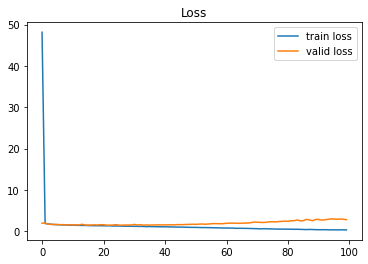

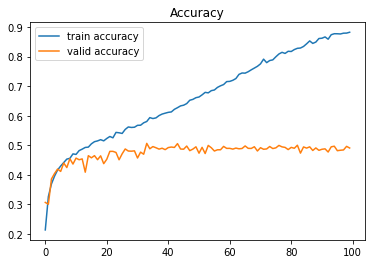

In [24]:
import matplotlib.pyplot as plt


train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["accuracy"]
valid_acc = model.history.history["val_accuracy"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()